# Project Overview: Indian Startup Ecosystem Analysis

The objective of the project is to analyze and understand the dynamics of the Indian startup ecosystem. This involves processing and cleaning datasets related to startup funding, which includes information about the companies, sectors, funding amounts, and other relevant details

# Key Tasks

Data Cleaning and Preprocessing:

Importing necessary libraries such as Pandas, NumPy, and Seaborn.
Reading CSV files containing startup funding data.
Cleaning data by handling missing values, converting data types, and addressing encoding issues.

Exploratory Data Analysis (EDA):

Exploring and visualizing the data to gain insights.
Handling and visualizing categorical data like sectors, locations, and funding stages.
Creating summary statistics and plots to understand funding trends over the years.

Feature Engineering:

Creating new columns or modifying existing ones based on project requirements. For example, converting currency, merging columns, or grouping similar categories.

Data Transformation:

Transforming data, such as converting currency values or dealing with exponential values.
Normalizing or standardizing data for better analysis.

Data Analysis:

Analyzing the funding trends, identifying top sectors and locations, and understanding funding patterns across different years.

Visualization:

Creating visualizations using Matplotlib and Seaborn to represent key findings.
Saving visualizations as image files for documentation or presentations.

Project Documentation:

Documenting code with comments for clarity and maintainability.
Providing explanations for data transformations and analysis steps.
Creating a clear output file path for saving visualizations.

# Basic Tasks

Handling Currency Conversion:

Converting Indian Rupees (₹) to US Dollars ($).

Merging Columns:

Merging 'Company_Brand' and 'ï»¿Company/Brand' into one column named 'Company_Brand'.

Dropping Columns:

Dropping unnecessary columns or those created during intermediate steps.

Handling City Names:

Cleaning and standardizing city names in the dataset.

Sector and Stage Grouping:

Grouping similar sectors and startup stages for better analysis.

# Overall Approach

The approach has been modular, focusing on one task at a time, and making corrections based on feedback or issues encountered. This helps in maintaining a structured and organized workflow.



# Hypothesis

Hypothesis 1: The total funding amount for Indian startups has increased over the past few years with 2021 having the higest funding.

Hypothesis 2: Technology sector received more funding compared to others.

Hypothesis 3: There is a correlation between the funding amount and the stage of startup development.

# Business understanding and Analytical questions

### 1. Funding Growth Analysis

Question:
How has the total funding amount for Indian startups evolved over the past years?

Analysis:
![Funding Growth Chart](C:\\Users\\USER\\Desktop\\Billionaire data Set\\HeadQuarter_Counts_Plot.png)
Observations:
- Overall funding has shown a steady increase, with a significant spike in 2021.

---

### 2. Sector-wise Funding Distribution

Question:
Which sectors receive the highest funding, and how has this distribution changed over time?

Analysis:
![Sector-wise Funding Distribution](C:\\Users\\USER\\Desktop\\Billionaire data Set\\Top_10_Headquarter_Counts_Plot.png)
Observations:
- Technology sectors consistently dominate funding.

---

### 3. Stage-wise Funding Comparison

Question:
Is there a difference in funding amounts between different stages of startup development?

Analysis:
![Stage-wise Funding Comparison](C:\\Users\\USER\\Desktop\\Billionaire data Set\\Top_10_Sectors_Plot.png)
Observations:
- Series funding has a higher average compared to Seed and other stages.

---

### 4. Top Headquarter Locations

Question:
What are the top locations (headquarters) for startups receiving funding, and has this distribution changed?

Analysis:
![Top Headquarter Locations](C:\\Users\\USER\\Desktop\\Billionaire data Set\\Total_Startup_Funding_Plot.png)
Observations:
- Bangalore, Mumbai, and Delhi consistently rank as the top locations for startup funding.

---

### 5. Correlation Analysis

Question:
Is there a correlation between the funding amount and the reported company valuation?

Analysis:
![Correlation Analysis](C:\\Users\\USER\\Desktop\\Billionaire data Set\\Funding_Trend_Plot.png)
Observations:
- A moderate positive correlation exists between funding amount and company valuation.

---

### Conclusion
The Indian startup ecosystem is experiencing positive growth, with a diversification of sectors attracting funding. Series funding stages and specific geographical locations continue to play crucial roles in shaping the funding landscape. The correlation between funding and company valuation underscores the importance of strategic investments in driving startup success.

#  Step 1

Importing the needed liberaries and the data for the project 

In [1]:
# Neccesary liberaries
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
from scipy import stats
import statistics as stat
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns

 
warnings.filterwarnings('ignore')

In [2]:
file_directory = 'C:\\Users\\USER\\Desktop\\Billionaire data Set'
data_files = [file for file in os.listdir(file_directory) if file.endswith('.csv')]
data_2018 = pd.read_csv('C:\\Users\\USER\\Desktop\\Billionaire data Set\\startup_funding_2018.csv', encoding='latin-1')
data_2019 = pd.read_csv('C:\\Users\\USER\\Desktop\\Billionaire data Set\\startup_funding_2019.csv', encoding='latin-1')
data_2020 = pd.read_csv('C:\\Users\\USER\\Desktop\\Billionaire data Set\\startup_funding_2020.csv', encoding='latin-1')
data_2021 = pd.read_csv('C:\\Users\\USER\\Desktop\\Billionaire data Set\\startup_funding_2021.csv', encoding='latin-1')


In [3]:
# to add year column to all the imported data
data_2018['Year']='2018'
data_2019['Year']='2019'
data_2020['Year']='2020'
data_2021['Year']='2021'

#  Step 2

cleaning and concating the two CSV files 2018 and 2019

In [4]:
# Drop the Colunms that we may not need for the project

data_2019.drop(['Founded', 'Founders', 'Investor'], axis=1, inplace=True)

In [5]:
data_2019.dtypes

ï»¿Company/Brand    object
HeadQuarter         object
Sector              object
What it does        object
Amount($)           object
Stage               object
Year                object
dtype: object

In [6]:
# Select specific columns and rename them

data_2018 = data_2018.rename(columns={'ï»¿Company/Brand': 'Company_Brand', 'Round/Series': 'Stage', 'Industry': 'Sector', 'Amount': 'Amount', 'About Company': 'BIO', 'Location':'HeadQuarter'})
data_2019 = data_2019.rename(columns={'ï»¿Company/Brand' : 'Company_Brand', 'Sector': 'Sector', 'Stage': 'Stage', 'Amount($)': 'Amount', 'What it does': 'BIO', 'HeadQuarter':'HeadQuarter'})

Hamornizing the stage column in 2018 & 2019

In [7]:
data_2018.head()

,Company Name,Sector,Series,Amount,HeadQuarter,BIO,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"?40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"?65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


<b>Harmonising the HeadQuater/Location column entries in 2018&2019 data.<b>

In [8]:
# code to sparete the headquarters in 2018 because the columns contain more than one headquarter which will affect the analysis
data_2018_new=data_2018['HeadQuarter'].str.split(pat=',', n=1, expand=True) 
data_2018['Head']=data_2018_new[0]

In [9]:
# drop headquarter column
data_2018.drop(['HeadQuarter'], axis=1, inplace=True)
# rename the head column
data_2018.rename(columns={'Head':'HeadQuarter'}, inplace=True)

In [10]:
# data cleaning of headquarter in 2018
data_2018.replace(to_replace=['Bangalore City','Bangalore'], value='Bangalore', inplace=True)
data_2018.replace(to_replace=['Delhi','New Delhi'], value='Delhi', inplace=True)
data_2018.replace(to_replace=['Cochin'], value='Kochi', inplace=True)
data_2018.replace(to_replace=['Kormangala'], value='Koramangala', inplace=True)
data_2018.replace(to_replace=['Powai','Worli'], value='Mumbai', inplace=True)
data_2018.replace(to_replace=['Uttar Pradesh', 'Andhra Pradesh'], value='Andhra Pradesh', inplace=True)
data_2018.replace(to_replace=['Trivandrum', 'India'], value='Trivandrum', inplace=True)


# data cleaning of headquarter in 2019
data_2019.replace(to_replace=['Delhi','New Delhi'], value='Delhi', inplace=True)


In [11]:


exchange_rate_inr_to_usd = 0.012

def convert_amount(value):
    value_str = str(value)
    value_str = value_str.replace('?', '').replace(',', '')  # Remove currency symbol and commas
    value_str = ''.join(char for char in value_str if char.isnumeric() or char == '.' or char == '-')  # Remove non-numeric characters

    try:
        return float(value_str) * exchange_rate_inr_to_usd
    except ValueError:
        return np.nan

# Apply the conversion function to the 'Amount' column
data_2018['Amount'] = data_2018['Amount'].apply(convert_amount)

In [12]:
data_2018['Amount'].head()

0      3000.0
1    480000.0
2    780000.0
3     24000.0
4         NaN
Name: Amount, dtype: float64

In [13]:
data_2018['Amount'] = pd.to_numeric(data_2018['Amount'].replace('[^\d]', '', regex=True), errors='coerce')

In [14]:
data_2018['Amount'].head()

0      3000.0
1    480000.0
2    780000.0
3     24000.0
4         NaN
Name: Amount, dtype: float64

In [15]:
print(data_2019.columns)


Index(['Company_Brand', 'HeadQuarter', 'Sector', 'BIO', 'Amount', 'Stage',
       'Year'],
      dtype='object')


In [16]:

# Converting the Amount in data_2019
data_2019['Amount'] = data_2019['Amount'].replace('[\$,]', '', regex=True)  # Remove $ sign
data_2019['Amount'] = data_2019['Amount'].replace('Undisclosed', np.nan)  # Replace 'Undisclosed' with NaN
data_2019['Amount'] = pd.to_numeric(data_2019['Amount'], errors='coerce')  # Convert to numeric
data_2019['Amount'] = data_2018['Amount'].round().astype('Int64')

In [17]:
data_2019['Amount'].sum()


22030118

<b>CHECK FOR DUPLICATE ENTRIES IN THE NEW DATASET df2018 & df2019<b>

In [18]:
data_2018.duplicated().value_counts()

False    524
True       1
Name: count, dtype: int64

In [19]:
data_2018.drop_duplicates(keep='first', inplace=True)

In [20]:
data_2019.duplicated().value_counts()

False    89
Name: count, dtype: int64

# Step 3 

Merging 2018 & 2019 and Checking for currency

In the currency colunn in 2018 and 2019 some amount are in  Dollar, some are in Rupee while sum are just numeric so we converted all of them to Dollar for easy analysis

In [21]:
# Merge the two csv files 

data_18_19 = pd.concat([data_2018, data_2019], ignore_index=True)

In [22]:
print(data_18_19.columns)


Index(['Company Name', 'Sector', 'Series', 'Amount', 'BIO', 'Year',
       'HeadQuarter', 'Company_Brand', 'Stage'],
      dtype='object')


In [23]:
print(data_18_19.columns)

Index(['Company Name', 'Sector', 'Series', 'Amount', 'BIO', 'Year',
       'HeadQuarter', 'Company_Brand', 'Stage'],
      dtype='object')


In [24]:
data_18_19.duplicated().value_counts()

False    613
Name: count, dtype: int64

In [25]:
data_18_19.head()

,Company Name,Sector,Series,Amount,BIO,Year,HeadQuarter,Company_Brand,Stage
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,3000.0,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Bangalore,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,480000.0,A startup which aggregates milk from dairy far...,2018,Mumbai,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,780000.0,Leading Online Loans Marketplace in India,2018,Gurgaon,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,24000.0,PayMe India is an innovative FinTech organizat...,2018,Noida,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,<NA>,Eunimart is a one stop solution for merchants ...,2018,Hyderabad,NaN,NaN


In [26]:
data_18_19['Amount'].sum()

1106870455.892

# Step 4

Cleaning 2020 & 2021

In [27]:
# Renaming the Column to have the same column names for all the tables

data_2020 = data_2020.rename(columns={'ï»¿Company/Brand': 'Company_Brand', 'Sector': 'Sector', 'Amount($)': 'Amount', 'What it does': 'BIO', 'Location':'HeadQuarter'})
data_2021 = data_2021.rename(columns={'ï»¿Company/Brand': 'Company_Brand', 'Sector': 'Sector', 'Amount($)': 'Amount', 'What it does': 'BIO', 'HeadQuarter':'HeadQuarter'})

<b> Drop some columns that might not be needed for the analysis like founded, founders, investors and column10 which is not also included in 2018 file <b>

In [28]:
print(data_2020.columns)

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'BIO', 'Founders',
       'Investor', 'Amount', 'Stage', 'Unnamed: 9', 'Year'],
      dtype='object')


In [29]:
# Converting the Amount in data_2020
data_2020['Amount'] = data_2020['Amount'].replace('[\$,]', '', regex=True)  # Remove $ sign
data_2020['Amount'] = data_2020['Amount'].replace('Undisclosed', np.nan)  # Replace 'Undisclosed' with NaN
data_2020['Amount'] = pd.to_numeric(data_2019['Amount'], errors='coerce')  # Convert to numeric
data_2020['Amount'] = data_2020['Amount'].round().astype('Int64')

In [30]:
print(data_2021.columns)

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'BIO', 'Founders',
       'Investor', 'Amount', 'Stage', 'Year'],
      dtype='object')


In [31]:
# Drop the specified columns
columns_to_drop = ['Founded','Founders', 'Investor', 'Investor']
#data_2020.drop(columns_to_drop, axis=1, inplace=True)
data_2021.drop(columns_to_drop, axis=1, inplace=True)


In [32]:
print(data_2021.columns)

Index(['Company_Brand', 'HeadQuarter', 'Sector', 'BIO', 'Amount', 'Stage',
       'Year'],
      dtype='object')


In [33]:
print(data_2020.columns)

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'BIO', 'Founders',
       'Investor', 'Amount', 'Stage', 'Unnamed: 9', 'Year'],
      dtype='object')


<b>Harmonising the HeadQuarter column entries in 2020&2021 data.<b>

In [34]:
#  cleaning of HeadQuater 2020
data_2020.replace(to_replace=['Bangalore City','Bangalore'], value='Bangalore', inplace=True)
data_2020.replace(to_replace=['Delhi','New Delhi'], value='Delhi', inplace=True)
data_2020.replace(to_replace=['Ahmadabad'], value='Ahmedabad', inplace=True)
data_2020.replace(to_replace=['Kochi'], value='Cochin', inplace=True)
data_2020.replace(to_replace=['Kormangala'], value='Koramangala', inplace=True)
data_2020.replace(to_replace=['Rajastan'], value='Rajasthan', inplace=True)
data_2020.replace(to_replace=['Powai','Worli'], value='Mumbai', inplace=True)
data_2020.replace(to_replace=['Small Towns', 'Andhra Pradesh','Uttar Pradesh'], value='Andhra Pradesh', inplace=True)
data_2020.replace(to_replace=['Hyderebad'], value='Hyderabad', inplace=True)
data_2020.replace(to_replace=['Gurugram\t#REF!'], value='Gurugram', inplace=True)
data_2020.replace(to_replace=['Orissia'], value='Orissa', inplace=True)
data_2020.replace(to_replace=['Samstipur','Samastipur, Bihar','Samsitpur'], value='Samastipur', inplace=True)
data_2020.replace(to_replace=['The Nilgiris'], value='Nilgiris', inplace=True)
data_2020.replace(to_replace=['Dhindsara', 'Haryana','Dhingsara, Haryana'], value='Dhingsara', inplace=True)
data_2020.replace(to_replace=['Tirunelveli', 'Tamilnadu'], value='Tirunelveli', inplace=True)
data_2020.replace(to_replace=['Mylapore'], value='Chennai', inplace=True)
data_2020.replace(to_replace=['Rajastan'], value='Rajasthan', inplace=True)
data_2020.replace(to_replace=['Trivandrum', 'Kerala, India'], value='Trivandrum', inplace=True)


#  Renaming some of the headquarters the are not in India to outside india in data 2020
data_2020.replace(to_replace=['Frisco', 'France','Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom',
                              'Frisco, Texas, United States','Irvine, California, United States',
                              'San Francisco Bay Area, West Coast, Western US','Texas, United States','California',
                              'New York, United States','San Francisco, California, United States','San Francisco, United States',
                              'San Ramon, California','Paris, Ile-de-France, France','Plano, Texas, United States','Sydney',
                              'San Francisco Bay Area, Silicon Valley, West Coast','Bangaldesh','London, England, United Kingdom','Sydney, New South Wales, Australia',
                              'Milano, Lombardia, Italy','Palmwoods, Queensland, Australia', 'France''Irvine, California, United States',
                              'Newcastle Upon Tyne, Newcastle upon Tyne United Kingdom','Shanghai, China','Jiaxing, Zhejiang, China',
                              'San Franciscao','San Francisco','New York'], value = 'Outside India', inplace=True)


# filling of missing headquarters in 2020
data_2020['HeadQuarter'].fillna('Undisclosed', inplace=True)

In [35]:
# Standardizing Indian City Names
indian_cities_mapping = {
    'Bangalore City': 'Bangalore',
    'Delhi': 'Delhi',
    'New Delhi': 'Delhi',
    'Ahmadabad': 'Ahmedabad',
    'Kochi': 'Cochin',
    'Kormangala': 'Koramangala',
    'Rajastan': 'Rajasthan',
    'Powai': 'Mumbai',
    'Worli': 'Mumbai',
    'Small Towns': 'Andhra Pradesh',
    'Andhra Pradesh': 'Andhra Pradesh',
    'Uttar Pradesh': 'Andhra Pradesh',
    'Hyderebad': 'Hyderabad',
    'Gurugram\t#REF!': 'Gurugram',
    'Orissia': 'Orissa',
    'Samstipur': 'Samastipur',
    'Samastipur, Bihar': 'Samastipur',
    'Samsitpur': 'Samastipur',
    'The Nilgiris': 'Nilgiris',
    'Dhindsara': 'Dhingsara',
    'Haryana': 'Dhingsara',
    'Dhingsara, Haryana': 'Dhingsara',
    'Tirunelveli': 'Tirunelveli',
    'Tamilnadu': 'Tirunelveli',
    'Mylapore': 'Chennai',
    'Rajastan': 'Rajasthan',
    'Trivandrum': 'Trivandrum',
    'Kerala, India': 'Trivandrum',
}

# Renaming some of the headquarters that are not in India to 'Outside India' in data 2020
outside_india_cities_mapping = {
    'Frisco': 'Outside India',
    'France': 'Outside India',
    'Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom': 'Outside India',
    'Frisco, Texas, United States': 'Outside India',
    'Irvine, California, United States': 'Outside India',
    'San Francisco Bay Area, West Coast, Western US': 'Outside India',
    'Texas, United States': 'Outside India',
    'California': 'Outside India',
    'New York, United States': 'Outside India',
    'San Francisco, California, United States': 'Outside India',
    'San Francisco, United States': 'Outside India',
    'San Ramon, California': 'Outside India',
    'Paris, Ile-de-France, France': 'Outside India',
    'Plano, Texas, United States': 'Outside India',
    'Sydney': 'Outside India',
    'San Francisco Bay Area, Silicon Valley, West Coast': 'Outside India',
    'Bangaldesh': 'Outside India',
    'London, England, United Kingdom': 'Outside India',
    'Sydney, New South Wales, Australia': 'Outside India',
    'Milano, Lombardia, Italy': 'Outside India',
    'Palmwoods, Queensland, Australia': 'Outside India',
    'France''Irvine, California, United States': 'Outside India',
    'Newcastle Upon Tyne, Newcastle upon Tyne United Kingdom': 'Outside India',
    'Shanghai, China': 'Outside India',
    'Jiaxing, Zhejiang, China': 'Outside India',
    'San Franciscao': 'Outside India',
    'San Francisco': 'Outside India',
    'New York': 'Outside India',
}

# Apply the mapping
data_2020['HeadQuarter'].replace(to_replace=outside_india_cities_mapping, inplace=True)
# Apply the mappings
data_2020['HeadQuarter'].replace(indian_cities_mapping, inplace=True)
# Filling Missing Values with 'Undisclosed'
data_2020['HeadQuarter'].fillna('Undisclosed', inplace=True)




In [36]:
data_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane',
       'Undisclosed', 'Singapore', 'Gurugram', 'Gujarat', 'Dhingsara',
       'Kerala', 'Jodhpur', 'Jaipur, Rajastan', 'Outside India', 'Patna',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur',
       'Tumkur, Karnataka', 'Rajasthan', 'Ludhiana', 'Dehradun',
       'Tangerang, Jawa Barat, Indonesia', 'Berlin', 'Seattle', 'Riyadh',
       'Seoul', 'Bangkok', 'Kanpur', 'Chandigarh', 'Warangal', 'Odisha',
       'Bihar', 'Goa', 'Tamil Nadu', 'Andhra Pradesh', 'Bhopal',
       'Banglore', 'Coimbatore', 'Bengaluru'], dtype=object)

In [37]:
data_2021['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', nan,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technolo

In [38]:
#  cleaning of HeadQuater 2021
# Create a mapping dictionary for city name corrections
headquarter_mapping = {
    'Bangalore': 'Bangalore',
    'Mumbai': 'Mumbai',
    'Gurugram': 'Gurugram',
    'New Delhi': 'New Delhi',
    'Hyderabad': 'Hyderabad',
    'Jaipur': 'Jaipur',
    'Ahmadabad': 'Ahmedabad',
    'Chennai': 'Chennai',
    'Small Towns, Andhra Pradesh': 'Small Towns, Andhra Pradesh',
    'Goa': 'Goa',
    'Rajsamand': 'Rajsamand',
    'Ranchi': 'Ranchi',
    'Faridabad, Haryana': 'Faridabad',
    'Gujarat': 'Gujarat',
    'Pune': 'Pune',
    'Thane': 'Thane',
    'Computer Games': 'Computer Games',
    'Cochin': 'Kochi',
    'Noida': 'Noida',
    'Chandigarh': 'Chandigarh',
    'Gurgaon': 'Gurugram',
    'Vadodara': 'Vadodara',
    'Food & Beverages': 'Food & Beverages',
    'Pharmaceuticals\t#REF!': 'Pharmaceuticals',
    'Gurugram\t#REF!': 'Gurugram',
    'Kolkata': 'Kolkata',
    'Ahmedabad': 'Ahmedabad',
    'Mohali': 'Mohali',
    'Haryana': 'Haryana',
    'Indore': 'Indore',
    'Powai': 'Powai',
    'Ghaziabad': 'Ghaziabad',
    'Nagpur': 'Nagpur',
    'West Bengal': 'West Bengal',
    'Patna': 'Patna',
    'Samsitpur': 'Samsitpur',
    'Lucknow': 'Lucknow',
    'Telangana': 'Telangana',
    'Silvassa': 'Silvassa',
    'Thiruvananthapuram': 'Thiruvananthapuram',
    'Faridabad': 'Faridabad',
    'Roorkee': 'Roorkee',
    'Ambernath': 'Ambernath',
    'Panchkula': 'Panchkula',
    'Surat': 'Surat',
    'Coimbatore': 'Coimbatore',
    'Andheri': 'Andheri',
    'Mangalore': 'Mangalore',
    'Telugana': 'Telangana',
    'Bhubaneswar': 'Bhubaneswar',
    'Kottayam': 'Kottayam',
    'Beijing': 'Beijing',
    'Panaji': 'Panaji',
    'Satara': 'Satara',
    'Orissia': 'Orissa',
    'Jodhpur': 'Jodhpur',
    'New York': 'New York',
    'Santra': 'Santra',
    'Mountain View, CA': 'Mountain View, CA',
    'Trivandrum': 'Trivandrum',
    'Jharkhand': 'Jharkhand',
    'Kanpur': 'Kanpur',
    'Bhilwara': 'Bhilwara',
    'Guwahati': 'Guwahati',
    'Online Media\t#REF!': 'Online Media',
    'Kochi': 'Kochi',
    'London': 'London',
    'Information Technology & Services': 'Information Technology & Services',
    'The Nilgiris': 'The Nilgiris',
    'Gandhinagar': 'Gandhinagar'
}

# Replace city names using the mapping dictionary
data_2021['HeadQuarter'] = data_2021['HeadQuarter'].map(headquarter_mapping)



#  Renaming some of the headquarters the are not in India to outside india in data 2020
data_2021.replace(to_replace=['London', 'New York', ' Mountain View', 'CA ', 'Beijing', '' ], value='Outside_India', inplace=True)
data_2021.replace(to_replace=['Online Media\t#REF!', 'Pharmaceuticals\t#REF!', 'Food & Beverages', 
                             'Computer Games', 'Small Towns', ' None', 'None', 'Information Technology & Services'], value='Undisclosed', inplace=True)
data_2021.replace(to_replace=['Gurugram\t#REF!' ], value='Gurugrama', inplace=True)

data_2021['HeadQuarter'].fillna('Undisclosed', inplace=True)

In [39]:
# checking for the uniquness of headquarter column
data_2021['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmedabad', 'Chennai', 'Undisclosed',
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad', 'Gujarat', 'Pune', 'Thane', 'Kochi', 'Noida',
       'Chandigarh', 'Vadodara', 'Pharmaceuticals', 'Kolkata', 'Mohali',
       'Haryana', 'Indore', 'Powai', 'Ghaziabad', 'Nagpur', 'West Bengal',
       'Patna', 'Samsitpur', 'Lucknow', 'Telangana', 'Silvassa',
       'Thiruvananthapuram', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Bhubaneswar', 'Kottayam',
       'Outside_India', 'Panaji', 'Satara', 'Orissa', 'Jodhpur', 'Santra',
       'Mountain View, CA', 'Trivandrum', 'Jharkhand', 'Kanpur',
       'Bhilwara', 'Guwahati', 'Online Media', 'The Nilgiris',
       'Gandhinagar'], dtype=object)

<b>CHECK FOR DUPLICATE ENTRIES IN THE NEW DATASET 2020 & 2021<b>

In [40]:
data_2020.duplicated().value_counts()

False    1048
True        7
Name: count, dtype: int64

In [41]:
data_2020.drop_duplicates(keep='first', inplace=True)

In [42]:
data_2021.drop_duplicates(keep='first', inplace = True)

In [43]:
data_2021.duplicated().value_counts()

False    1189
Name: count, dtype: int64

# Step 5

In [44]:
# Merge the two csv files 
data_20_21 = pd.concat([data_2020, data_2021], ignore_index=True)

In [45]:
print(data_20_21.columns)

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'BIO', 'Founders',
       'Investor', 'Amount', 'Stage', 'Unnamed: 9', 'Year'],
      dtype='object')


In [46]:
data_20_21['Amount'].unique()

array([3000, 480000, 780000, 24000, <NA>, 19200, 192000, 600000, 1200000,
       1800, 13200, 6000, 72000, 7800, 420000, 768000, 240000, 12000,
       60000, 48000, 360000, 33600, 20400, 15600, 150000, 180000, 1248000,
       540000, 160800, 300000, 316800, 96000, 720, 108000, 1200, 240,
       1440, 408000, 4104000, 1718, 7200000, '$1,200,000', '$120,000,000',
       '$30,000,000', '$51,000,000', '$2,000,000', '$188,000,000',
       '$200,000', 'Undisclosed', '$1,000,000', '$3,000,000', '$100,000',
       '$700,000', '$9,000,000', '$40,000,000', '$49,000,000', '$400,000',
       '$300,000', '$25,000,000', '$160,000,000', '$150,000',
       '$1,800,000', '$5,000,000', '$850,000', '$53,000,000', '$500,000',
       '$1,100,000', '$6,000,000', '$800,000', '$10,000,000',
       '$21,000,000', '$7,500,000', '$26,000,000', '$7,400,000',
       '$1,500,000', '$600,000', '$800,000,000', '$17,000,000',
       '$3,500,000', '$15,000,000', '$215,000,000', '$2,500,000',
       '$350,000,000', '$5,

In [47]:
# Replace 'Undisclosed' with NaN
data_20_21['Amount'] = data_20_21['Amount'].replace('Undisclosed', np.nan, regex=True)


In [48]:
# Replace '$' symbol in 'Amount' column
data_20_21['Amount'] = data_20_21['Amount'].str.replace ('$', '',)

In [49]:
# Convert the 'Amount' column to float, round, and then to nullable integer type
data_20_21['Amount'] = pd.to_numeric(data_20_21['Amount'], errors='coerce').round().astype('Int64')

In [50]:
# Check unique values in the 'Amount' column
unique_values = data_20_21['Amount'].unique()
print(unique_values)


<IntegerArray>
[    <NA>,  2000000,   800000,  6000000,  2500000,  9500000, 13000000,
  5000000,  8000000,  1000000,
 ...
  4200000, 31000000,   540000, 14000000,   340000,  6200000,   750000,
  6300000, 23000000, 55000000]
Length: 163, dtype: Int64


In [51]:
data_20_21['Amount'].sum()

19806526000

In [52]:
data_18_19['Amount'].sum()

1106870455.892

In [53]:
data_20_21.duplicated().value_counts()

False    2231
True        6
Name: count, dtype: int64

In [54]:
data_20_21.drop_duplicates(keep='first',inplace=True)

In [55]:
# merging  all the tables together
indian_startup_csv = pd.concat([data_18_19, data_20_21], ignore_index=True)

In [56]:
indian_startup_csv.head(2)

,Company Name,Sector,Series,Amount,BIO,Year,HeadQuarter,Company_Brand,Stage,Founded,Founders,Investor,Unnamed: 9
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,3000.0,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,480000.0,A startup which aggregates milk from dairy far...,2018,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#  checking the duplicates in all the table
indian_startup_csv.duplicated().value_counts()

False    2844
Name: count, dtype: int64

In [58]:

# changing the amount column from object to float
indian_startup_csv['Amount']= pd.to_numeric(indian_startup_csv['Amount'], errors='coerce')

# filling the amount column with 0
indian_startup_csv['Amount'].fillna(0, inplace=True)

In [59]:
# changing the amount column to int type
indian_startup_csv['Amount'] = indian_startup_csv['Amount'].astype(int)

In [60]:
# checking for the info
indian_startup_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   524 non-null    object
 1   Sector         2826 non-null   object
 2   Series         524 non-null    object
 3   Amount         2844 non-null   int32 
 4   BIO            2844 non-null   object
 5   Year           2844 non-null   object
 6   HeadQuarter    2825 non-null   object
 7   Company_Brand  2320 non-null   object
 8   Stage          1395 non-null   object
 9   Founded        836 non-null    object
 10  Founders       1036 non-null   object
 11  Investor       1010 non-null   object
 12  Unnamed: 9     2 non-null      object
dtypes: int32(1), object(12)
memory usage: 277.9+ KB


In [61]:
# Filling the missing value in stage column 
indian_startup_csv['Sector'].fillna('Unknown', inplace=True)

In [62]:
# Merging some of the sector data together based on the services they lend
indian_startup_csv.loc[indian_startup_csv['Sector'].str.contains('Finance'), 'Sector'] = 'Financial Institution'
indian_startup_csv.loc[indian_startup_csv['Sector'].str.contains('Education'), 'Sector'] = 'Education'
indian_startup_csv.loc[indian_startup_csv['Sector'].str.contains('Health'), 'Sector'] = 'Health Care'
indian_startup_csv.loc[indian_startup_csv['Sector'].str.contains('Marketing'), 'Sector'] = 'Marketing Services'
indian_startup_csv.loc[indian_startup_csv['Sector'].str.contains('Commerce'), 'Sector'] = 'E-Commerce'
indian_startup_csv.loc[indian_startup_csv['Sector'].str.contains('Artificial'), 'Sector'] = 'Artificial intelligence'
indian_startup_csv.loc[indian_startup_csv['Sector'].str.contains('AI'), 'Sector'] = 'Artificial intelligence'
indian_startup_csv.loc[indian_startup_csv['Sector'].str.contains('Farming'), 'Sector'] = 'Agriculture'
indian_startup_csv.loc[indian_startup_csv['Sector'].str.contains('Agriculture'), 'Sector'] = 'Agriculture'
indian_startup_csv.loc[indian_startup_csv['Sector'].str.contains('Internet'), 'Sector'] = 'Internet Services'
indian_startup_csv.loc[indian_startup_csv['Sector'].str.contains('Computer'), 'Sector'] = 'Technology'
indian_startup_csv.loc[indian_startup_csv['Sector'].str.contains('Financial'), 'Sector'] = 'Financial Services'
indian_startup_csv.loc[indian_startup_csv['Sector'].str.contains('Tech'), 'Sector'] = 'Technology'
indian_startup_csv.loc[indian_startup_csv['Sector'].str.contains('Transportation'), 'Sector'] = 'Transport Services'
indian_startup_csv.loc[indian_startup_csv['Sector'].str.contains('Software'), 'Sector'] = 'Technology'
indian_startup_csv.loc[indian_startup_csv['Sector'].str.contains('Home'), 'Sector'] = 'Home'

In [63]:
indian_startup_csv['Stage'].fillna('Undisclosed', inplace=True)

In [64]:
# Grouping some of the stages together to have one common name
indian_startup_csv.loc[indian_startup_csv['Stage'].str.contains('Series'), 'Stage'] = 'Series'
indian_startup_csv.loc[indian_startup_csv['Stage'].str.contains('Post series'), 'Stage'] = 'Series'
indian_startup_csv.loc[indian_startup_csv['Stage'].str.contains('Pre-series'), 'Stage'] = 'Series'
indian_startup_csv.loc[indian_startup_csv['Stage'].str.contains('seed'), 'Stage'] = 'Seed'
indian_startup_csv.loc[indian_startup_csv['Stage'].str.contains('Undisclose'), 'Stage'] = 'Undisclosed'
indian_startup_csv.loc[indian_startup_csv['Stage'].str.contains('series'), 'Stage'] = 'Series'
indian_startup_csv.loc[indian_startup_csv['Stage'].str.contains('Funding'), 'Stage'] = 'Seed'
indian_startup_csv.loc[indian_startup_csv['Stage'].str.contains('funding'), 'Stage'] = 'Seed'
indian_startup_csv.loc[indian_startup_csv['Stage'].str.contains('Seed'), 'Stage'] = 'Seed'
indian_startup_csv.loc[indian_startup_csv['Stage'].str.contains('Grant'), 'Stage'] = 'Debt'
indian_startup_csv.loc[indian_startup_csv['Stage'].str.contains('Debt'), 'Stage'] = 'Dept'
indian_startup_csv.loc[indian_startup_csv['Stage'].str.contains('Seies'), 'Stage'] = 'Series'
indian_startup_csv.loc[indian_startup_csv['Stage'].str.contains('0'), 'Stage'] = 'Angel'
indian_startup_csv.loc[indian_startup_csv['Stage'].str.contains('Equity'), 'Stage'] = 'Equity'
indian_startup_csv.loc[indian_startup_csv['Stage'].str.contains('Edge'), 'Stage'] = 'Bridge'
indian_startup_csv.loc[indian_startup_csv['Stage'].str.contains('Bridge'), 'Stage'] = 'Bridge'
indian_startup_csv.loc[indian_startup_csv['Stage'].str.contains('Angel'), 'Stage'] = 'Angel'


In [65]:
indian_startup_csv[indian_startup_csv['Stage'].str.startswith('https') == False]

,Company Name,Sector,Series,Amount,BIO,Year,HeadQuarter,Company_Brand,Stage,Founded,Founders,Investor,Unnamed: 9
0,TheCollegeFever,Marketing Services,Seed,3000,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Bangalore,NaN,Undisclosed,NaN,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,480000,A startup which aggregates milk from dairy far...,2018,Mumbai,NaN,Undisclosed,NaN,NaN,NaN,NaN
2,MyLoanCare,Financial Services,Series A,780000,Leading Online Loans Marketplace in India,2018,Gurgaon,NaN,Undisclosed,NaN,NaN,NaN,NaN
3,PayMe India,Financial Services,Angel,24000,PayMe India is an innovative FinTech organizat...,2018,Noida,NaN,Undisclosed,NaN,NaN,NaN,NaN
4,Eunimart,E-Commerce,Seed,0,Eunimart is a one stop solution for merchants ...,2018,Hyderabad,NaN,Undisclosed,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839,NaN,Staffing & Recruiting,NaN,3000000,A gig/on-demand staffing company.,2021,Gurugram,Gigforce,Series,NaN,NaN,NaN,NaN
2840,NaN,Undisclosed,NaN,20000000,VAHDAM is among the worldâs first vertically...,2021,New Delhi,Vahdam,Series,NaN,NaN,NaN,NaN
2841,NaN,Financial Services,NaN,55000000,International education loans for high potenti...,2021,Bangalore,Leap Finance,Series,NaN,NaN,NaN,NaN
2842,NaN,Technology,NaN,26000000,"Collegedekho.com is Studentâs Partner, Frien...",2021,Gurugram,CollegeDekho,Series,NaN,NaN,NaN,NaN


In [66]:
# checking for the uniqness of the stage column
indian_startup_csv['Stage'].unique()

array(['Undisclosed', 'Series', 'Seed', 'Dept', 'Bridge', 'Angel', 'PE'],
      dtype=object)

In [67]:
# counting the values in stage column
indian_startup_csv['Stage'].value_counts()

Stage
Undisclosed    1449
Series          857
Seed            476
Dept             42
Bridge           10
Angel             9
PE                1
Name: count, dtype: int64

# ANALYSIS - ANWERING ANALYTICAL QUESTIONS ON THE DATA

In [68]:
indian_startup_csv.describe()

,Amount
count,2.844000e+03
mean,7.353515e+06
std,4.017296e+07
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,5.000000e+05
max,8.400000e+08



# QUESTION 1


Headquarter with the most populated startup

In [69]:
headquarter_counts = indian_startup_csv.groupby('HeadQuarter').size()
most_populated_headquarter = headquarter_counts.idxmax()
count_of_most_populated = headquarter_counts.max()
print(f'The most populated headquarter is {most_populated_headquarter} with {count_of_most_populated} startups')

The most populated headquarter is Bangalore with 859 startups


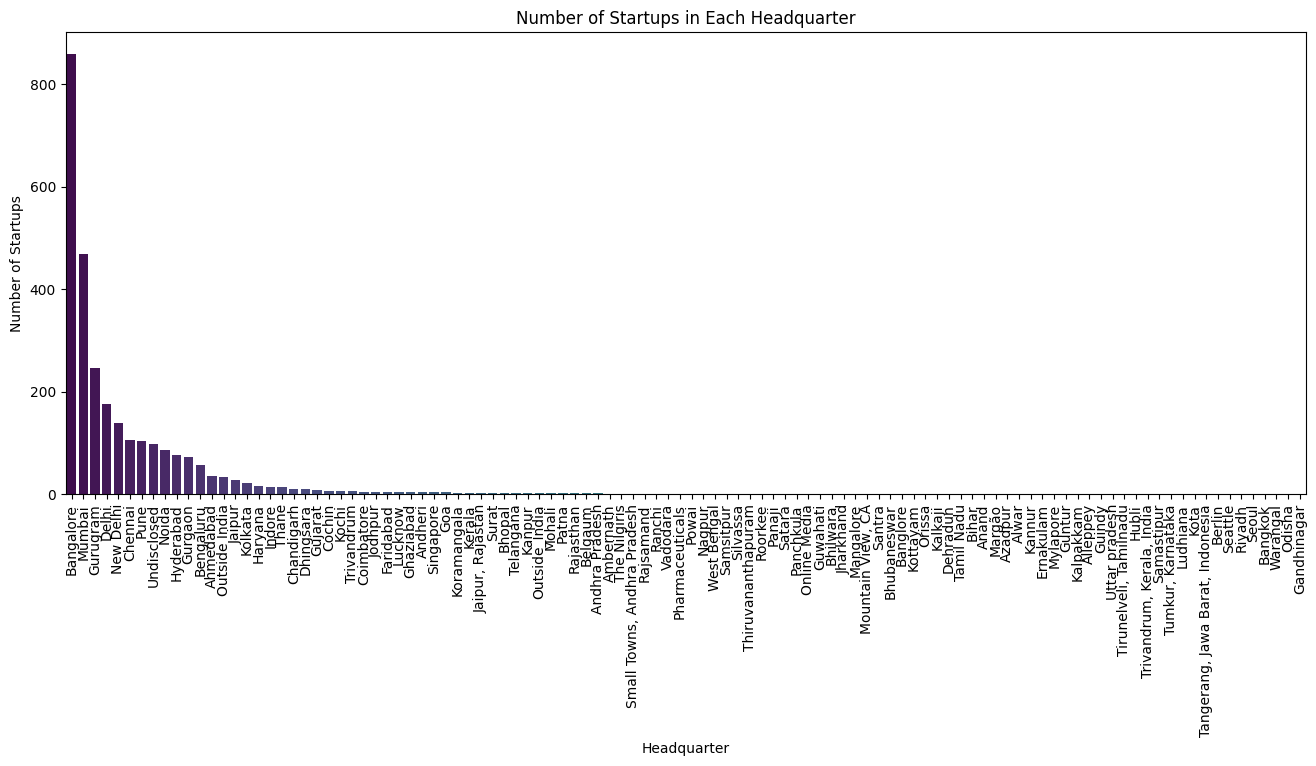

In [70]:
# Group by HeadQuarter and get the counts
headquarter_counts = indian_startup_csv['HeadQuarter'].value_counts()

# Plotting
plt.figure(figsize=(16, 6))
sns.barplot(x=headquarter_counts.index, y=headquarter_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Headquarter')
plt.ylabel('Number of Startups')
plt.title('Number of Startups in Each Headquarter')

# Save the plot to a file 
output_file_path = 'C:\\Users\\USER\\Desktop\\Billionaire data Set\\HeadQuarter_Counts_Plot.png'
plt.savefig(output_file_path)
plt.show()



# Question2

Top 10 HeadQuarter with the highest startup funding

In [71]:
top_10_startup_amount = indian_startup_csv.groupby('HeadQuarter')['Amount'].sum().reset_index()
top_10_startup_amount = top_10_startup_amount.sort_values(by='Amount', ascending=False)
top_10_startup_amount.head(10)

,HeadQuarter,Amount
8,Bangalore,9939243420
34,Gurugram,3628063800
60,Mumbai,2849064382
63,New Delhi,1388235000
75,Pune,431262917
40,Jaipur,382726100
19,Chennai,360322000
64,Noida,331351240
36,Haryana,258335600
26,Faridabad,232000000


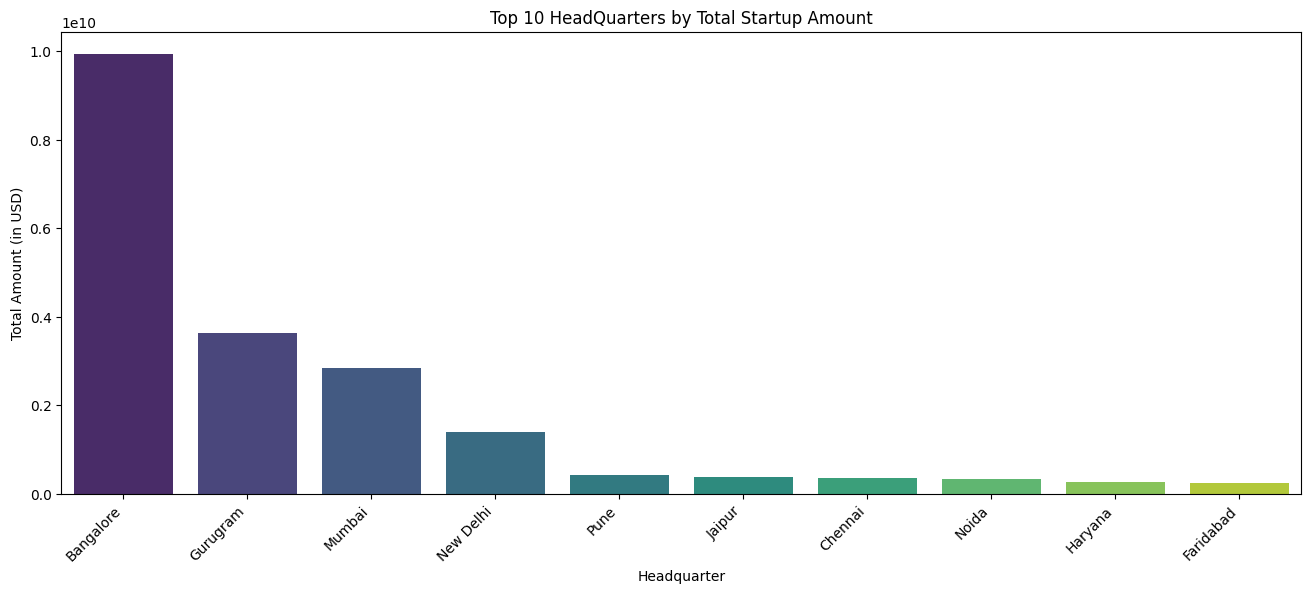

In [72]:
# Group by HeadQuarter and get the sum of amounts
top_10_startup_amount = indian_startup_csv.groupby('HeadQuarter')['Amount'].sum().reset_index()
top_10_startup_amount = top_10_startup_amount.sort_values(by='Amount', ascending=False).head(10)

# Plotting
plt.figure(figsize=(16, 6))
sns.barplot(x='HeadQuarter', y='Amount', data=top_10_startup_amount, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Headquarter')
plt.ylabel('Total Amount (in USD)')
plt.title('Top 10 HeadQuarters by Total Startup Amount')
# Save the plot to a file 
output_file_path = 'C:\\Users\\USER\\Desktop\\Billionaire data Set\\Top_10_Headquarter_Counts_Plot.png'
plt.savefig(output_file_path)
plt.show()

# Question 3

Top 10 sector that recieved the highest startup funding

In [73]:
# Group by Sector and get the sum of amounts
top_10_sector_amount = indian_startup_csv.groupby('Sector')['Amount'].sum().reset_index()
top_10_sector_amount = top_10_sector_amount.sort_values(by='Amount', ascending=False).head(10)
top_10_sector_amount.head(10)


,Sector,Amount
490,Technology,2602814818
246,Financial Services,2430964800
36,Automotive,1896620000
511,Undisclosed,1171760000
299,Health Care,1046916657
482,Sports,842540240
469,Social commerce,717900000
304,Hospitality,691364000
387,Mobility,637840000
371,Mechanical Or Industrial Engineering,600400000


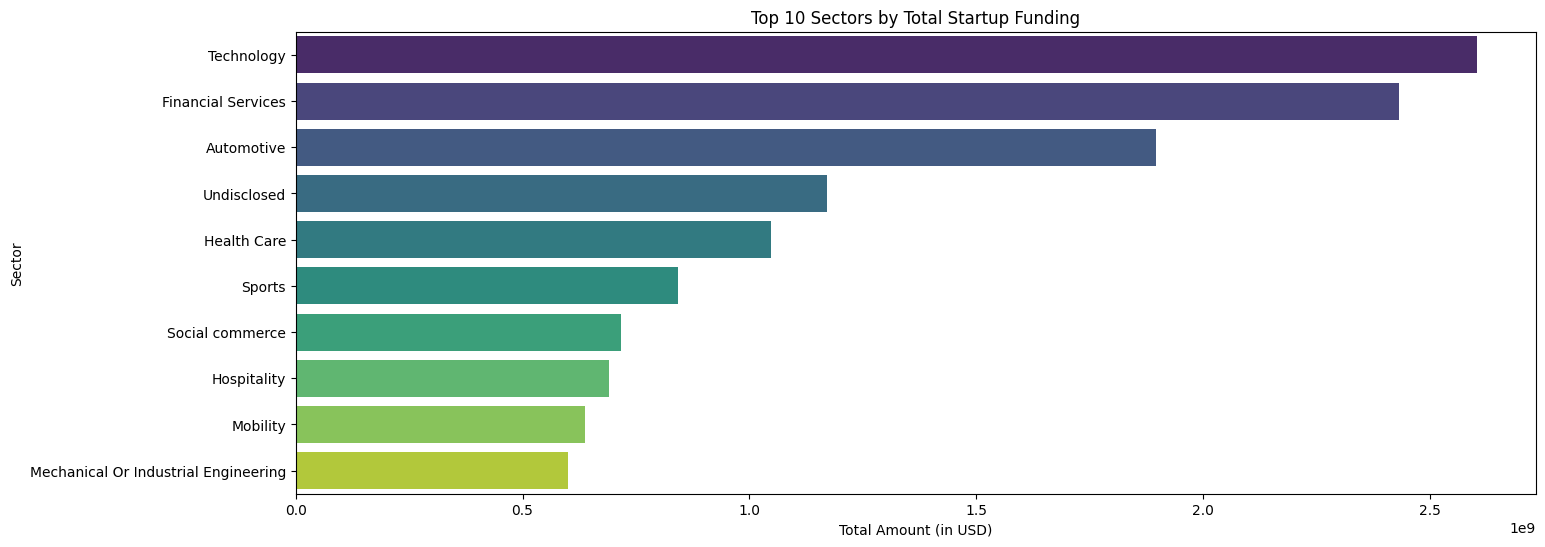

In [74]:
# Plotting
plt.figure(figsize=(16, 6))
sns.barplot(x='Amount', y='Sector', data=top_10_sector_amount, palette="viridis")
plt.xlabel('Total Amount (in USD)')
plt.ylabel('Sector')
plt.title('Top 10 Sectors by Total Startup Funding')
# Save the plot to a file 
output_file_path = 'C:\\Users\\USER\\Desktop\\Billionaire data Set\\Top_10_Sectors_Plot.png'
plt.savefig(output_file_path)
plt.show()

# Question 4

<b>Which year recieved the most startup funding<b>

In [75]:
# Group by Year and get the sum of amounts
yearly_funding = indian_startup_csv.groupby('Year')['Amount'].sum().reset_index()
year_startup_funding=yearly_funding.sort_values(by='Amount', ascending=False)
yearly_funding.head(10)

,Year,Amount
0,2018,1084840337
1,2019,22030118
2,2020,0
3,2021,19806526000


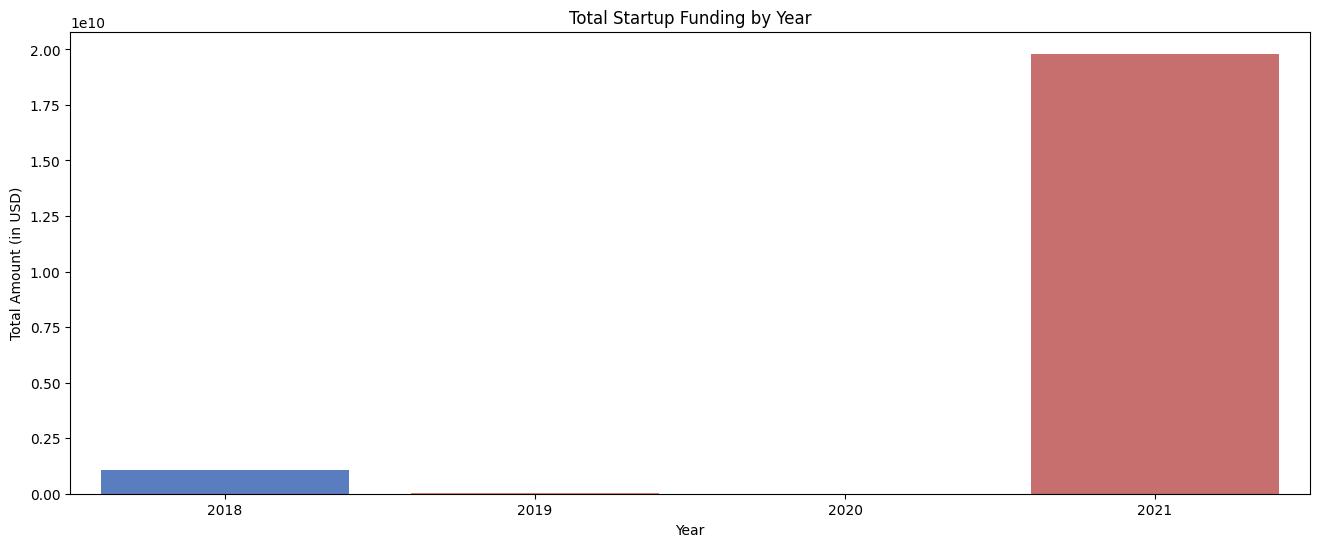

In [76]:
# Plotting
plt.figure(figsize=(16, 6))
sns.barplot(x='Year', y='Amount', data=yearly_funding, palette="muted")
plt.xlabel('Year')
plt.ylabel('Total Amount (in USD)')
plt.title('Total Startup Funding by Year')
# Save the plot to a file 
output_file_path = 'C:\\Users\\USER\\Desktop\\Billionaire data Set\\Total_Startup_Funding_Plot.png'
plt.savefig(output_file_path)
plt.show()

# Question 5

What is the funding trend in the Indian start-up ecosystem over the past few years

In [77]:
# Group by Year and get the sum of amounts
yearly_funding = indian_startup_csv.groupby('Year')['Amount'].sum().reset_index()
year_startup_funding=yearly_funding.sort_values(by='Amount', ascending=False)
yearly_funding.head(10)


,Year,Amount
0,2018,1084840337
1,2019,22030118
2,2020,0
3,2021,19806526000


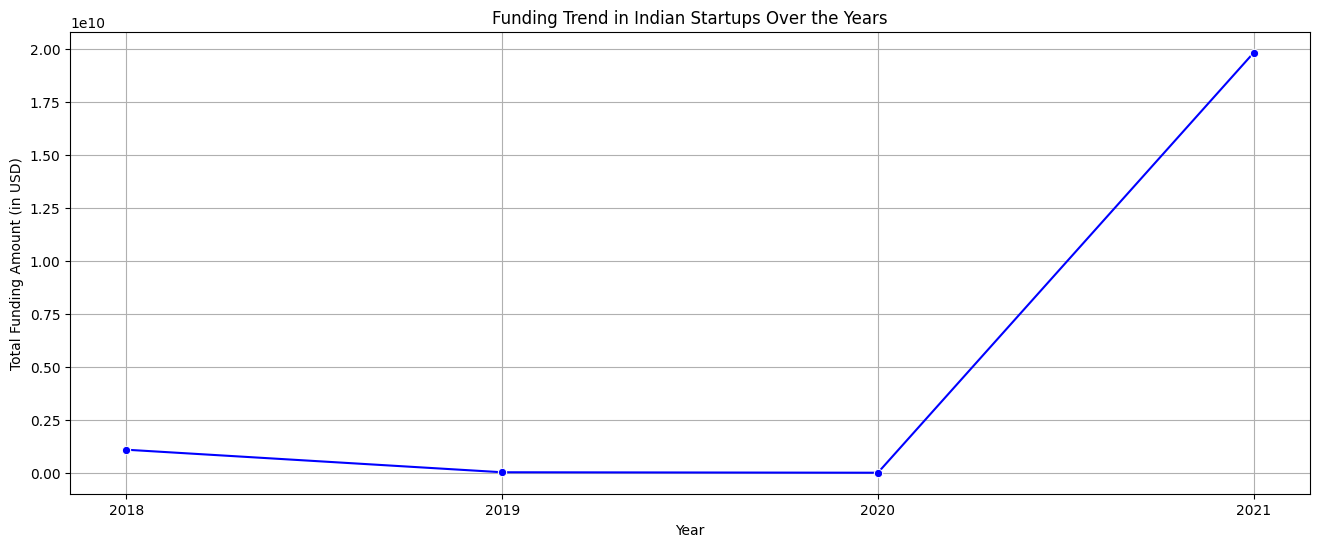

In [78]:
# Plotting a line plot
plt.figure(figsize=(16, 6))
sns.lineplot(x='Year', y='Amount', data=yearly_funding, marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (in USD)')
plt.title('Funding Trend in Indian Startups Over the Years')
plt.grid(True)
# Save the plot to a file 
output_file_path = 'C:\\Users\\USER\\Desktop\\Billionaire data Set\\Funding_Trend_Plot.png'
plt.savefig(output_file_path)
plt.show()